# EVALUACIÓN FINAL: Módulo 3
## Fase 1: Exploración y Limpieza
1. Exploración Inicial:
Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas
relevantes.
Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de
las columnas involucradas.
Une los dos conjuntos de datos de la forma más eficiente.

2. Limpieza de Datos:
Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los
datos para el análisis estadístico.


In [54]:
# Realizamos todas las importaciones necesarias, entre ellas pandas:  

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np 

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import shapiro
from scipy.stats import spearmanr, kendalltau

# Configuración
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.float_format', '{:.2f}'.format)

In [2]:
# Abrimos los dataframes y utilizamos .head() para visualizarmos

df_flight = pd.read_csv("files/Customer Flight Activity.csv", index_col=0)

df_loyalty = pd.read_csv("files/Customer Loyalty History.csv", index_col=0)

df_flight.head(10)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
Loyalty Number,,,,,,,,,
100018,2017,1,3,0,3,1521,152.00,0,0
100102,2017,1,10,4,14,2030,203.00,0,0
100140,2017,1,6,0,6,1200,120.00,0,0
100214,2017,1,0,0,0,0,0.00,0,0
100272,2017,1,0,0,0,0,0.00,0,0
100301,2017,1,0,0,0,0,0.00,0,0
100364,2017,1,0,0,0,0,0.00,0,0
100380,2017,1,0,0,0,0,0.00,0,0
100428,2017,1,6,0,6,606,60.00,0,0


In [3]:
df_loyalty.head(10)

,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,
480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.00,Married,Star,3839.14,Standard,2016,2,NaN,NaN
549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.00,1.00
608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.00,Married,Star,3842.79,Standard,2014,10,NaN,NaN
193662,Canada,Yukon,Whitehorse,Y2K 6R0,Male,Bachelor,51124.00,Married,Star,3844.57,Standard,2012,5,NaN,NaN
927943,Canada,Ontario,Toronto,P5S 6R4,Female,College,NaN,Single,Star,3857.95,Standard,2014,6,NaN,NaN
188893,Canada,Ontario,Trenton,K8V 4B2,Male,Bachelor,100159.00,Married,Star,3861.49,Standard,2016,12,NaN,NaN
852392,Canada,Quebec,Montreal,H2Y 2W2,Female,Bachelor,100159.00,Married,Star,3861.49,Standard,2015,5,NaN,NaN


**Realizamos una exploración rápida donde vemos los cambios que debemos realizar en cada Data Frame**

**df_fight** -> 
- Cambio de los títulos, los pondremos en minúsculas y sustituiremos los espacios por guiones bajos para facilitar su entendimiento y visualización. 
- Al observar todas las columnas vemos que existen muchos valores igual a cero, por lo analizaremos si será necesario eliminar columnas más adelante, en caso de que no nos resulten útiles en el análisis de los datos. 

**df_loyalty** -> 
- Cambio de los títulos, los pondremos en minúsculas y sustituiremos los espacios por guiones bajos para facilitar su entendimiento y visualización. 
- Vemos que muchas columnas presentan valores nulos y duplicados, veremos a continuación su imputación. 


In [4]:
# Usando merge para combinar los DataFrames en función del índice
df_merge = pd.merge(df_flight, df_loyalty, left_index=True, right_index=True)

# Visualizamos el nuevo data frame, especificando que nos saque las 10 primeras filas 
df_merge.head(10)

,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
Loyalty Number,,,,,,,,,,,,,,,,,,,,,,,,
100018,2017,1,3,0,3,1521,152.00,0,0,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.00,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
100102,2017,1,10,4,14,2030,203.00,0,0,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
100140,2017,1,6,0,6,1200,120.00,0,0,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
100214,2017,1,0,0,0,0,0.00,0,0,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,63253.00,Married,Star,4170.57,Standard,2015,8,NaN,NaN
100272,2017,1,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,91163.00,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN
100301,2017,1,0,0,0,0,0.00,0,0,Canada,Ontario,Toronto,P1J 8T7,Male,Bachelor,70323.00,Divorced,Nova,48356.96,Standard,2013,9,NaN,NaN
100364,2017,1,0,0,0,0,0.00,0,0,Canada,Saskatchewan,Regina,S6J 3G0,Male,Bachelor,76849.00,Married,Nova,5143.88,Standard,2015,5,NaN,NaN
100380,2017,1,0,0,0,0,0.00,0,0,Canada,Quebec,Montreal,H2T 9K8,Female,Bachelor,69695.00,Single,Star,2465.62,Standard,2012,10,NaN,NaN
100428,2017,1,6,0,6,606,60.00,0,0,Canada,British Columbia,Vancouver,V6E 3D9,Male,Bachelor,63478.00,Married,Aurora,5845.43,Standard,2012,8,NaN,NaN


In [5]:
# Comprobamos la dimensión de ambos data frames antes de la unión y tras la unión 
print(f"En el data frame flights, el número de filas que tenemos es {df_flight.shape[0]}, y el número de columnas es {df_flight.shape[1]}")
print(f"En el data frame loyalty, el número de filas que tenemos es {df_loyalty.shape[0]}, y el número de columnas es {df_loyalty.shape[1]}")
print(f"En el data frame mergeado, el número de filas que tenemos es {df_merge.shape[0]}, y el número de columnas es {df_merge.shape[1]}")

En el data frame flights, el número de filas que tenemos es 405624, y el número de columnas es 9
En el data frame loyalty, el número de filas que tenemos es 16737, y el número de columnas es 15
En el data frame mergeado, el número de filas que tenemos es 405624, y el número de columnas es 24


In [6]:
#A continuación haremos una exploración del dataframe 
def exploracion_dataframe(dataframe, columna_control):
    """
    Realiza un análisis exploratorio básico de un DataFrame, mostrando información sobre duplicados,
    valores nulos, tipos de datos, valores únicos para columnas categóricas y estadísticas descriptivas
    para columnas categóricas y numéricas, agrupadas por la columna de control.

    Parámetros:
    - dataframe (DataFrame): El DataFrame que se va a explorar.
    - columna_control (str): El nombre de la columna que se utilizará como control para dividir el DataFrame.

    Returns: 
    No devuelve nada directamente, pero imprime en la consola la información exploratoria.
    """
    
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    
    
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    
    
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valore únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())    
    
    # Sacamos los principales estadísticos del dataframe 
    
    for categoria in dataframe[columna_control].unique():
        
        dataframe_filtrado = dataframe[dataframe[columna_control] == categoria]
    
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe(include = "O").T)
        
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas para el {categoria.upper()} son: ")
        display(dataframe_filtrado.describe().T)

In [7]:
# Llamamos a la función y comprobamos el resultado de la exploración. Utilizamos como columna de control la columna Education, ya que posteriormente nos será útil 
# ante nuestra Prueba A/B Testing 
exploracion_dataframe(df_merge, "Education")

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.31
Cancellation Year,87.66
Cancellation Month,87.66



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64
Country,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valore únicos:


,count
Country,
Canada,405624


La columna PROVINCE tiene las siguientes valore únicos:


,count
Province,
Ontario,130896
British Columbia,106848
Quebec,79968
Alberta,23400
Manitoba,15984


La columna CITY tiene las siguientes valore únicos:


,count
City,
Toronto,81096
Vancouver,62520
Montreal,49920
Winnipeg,15984
Whistler,14040


La columna POSTAL CODE tiene las siguientes valore únicos:


,count
Postal Code,
V6E 3D9,21984
V5R 1W3,16608
V6T 1Y8,14040
V6E 3Z3,13200
M2M 7K8,12936


La columna GENDER tiene las siguientes valore únicos:


,count
Gender,
Female,203640
Male,201984


La columna EDUCATION tiene las siguientes valore únicos:


,count
Education,
Bachelor,253752
College,102672
High School or Below,19008
Doctor,17856
Master,12336


La columna MARITAL STATUS tiene las siguientes valore únicos:


,count
Marital Status,
Married,235800
Single,108648
Divorced,61176


La columna LOYALTY CARD tiene las siguientes valore únicos:


,count
Loyalty Card,
Star,184224
Nova,137568
Aurora,83832


La columna ENROLLMENT TYPE tiene las siguientes valore únicos:


,count
Enrollment Type,
Standard,382200
2018 Promotion,23424



 ..................... 

Los principales estadísticos de las columnas categóricas para el BACHELOR son: 


,count,unique,top,freq
Country,253752,1,Canada,253752
Province,253752,11,Ontario,81192
City,253752,29,Toronto,51120
Postal Code,253752,54,V6E 3D9,13944
Gender,253752,2,Female,127872
Education,253752,1,Bachelor,253752
Marital Status,253752,3,Married,172224
Loyalty Card,253752,3,Star,108336
Enrollment Type,253752,2,Standard,238488



 ..................... 

Los principales estadísticos de las columnas numéricas para el BACHELOR son: 


,count,mean,std,min,25%,50%,75%,max
Year,253752.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,253752.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,253752.00,4.09,5.22,0.00,0.00,1.00,8.00,21.00
Flights with Companions,253752.00,1.03,2.07,0.00,0.00,0.00,1.00,11.00
Total Flights,253752.00,5.12,6.51,0.00,0.00,1.00,10.00,32.00
Distance,253752.00,1202.80,1432.31,0.00,0.00,450.00,2326.00,6262.00
Points Accumulated,253752.00,123.16,146.62,0.00,0.00,46.00,238.00,675.00
Points Redeemed,253752.00,30.39,124.88,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,253752.00,2.46,10.10,0.00,0.00,0.00,0.00,71.00
Salary,253752.00,72476.21,17205.71,-58486.00,58711.00,71971.00,85848.00,105563.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el COLLEGE son: 


,count,unique,top,freq
Country,102672,1,Canada,102672
Province,102672,11,Ontario,33624
City,102672,29,Toronto,20280
Postal Code,102672,55,V6E 3D9,5736
Gender,102672,2,Male,52104
Education,102672,1,College,102672
Marital Status,102672,3,Single,58776
Loyalty Card,102672,3,Star,51072
Enrollment Type,102672,2,Standard,96936



 ..................... 

Los principales estadísticos de las columnas numéricas para el COLLEGE son: 


,count,mean,std,min,25%,50%,75%,max
Year,102672.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,102672.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,102672.00,4.15,5.24,0.00,0.00,1.00,8.00,21.00
Flights with Companions,102672.00,1.04,2.09,0.00,0.00,0.00,1.00,11.00
Total Flights,102672.00,5.20,6.55,0.00,0.00,2.00,10.00,32.00
Distance,102672.00,1215.32,1432.35,0.00,0.00,531.00,2345.00,6293.00
Points Accumulated,102672.00,124.23,146.38,0.00,0.00,54.00,240.00,655.50
Points Redeemed,102672.00,31.30,126.74,0.00,0.00,0.00,0.00,876.00
Dollar Cost Points Redeemed,102672.00,2.53,10.25,0.00,0.00,0.00,0.00,71.00
Salary,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN



 ..................... 

Los principales estadísticos de las columnas categóricas para el MASTER son: 


,count,unique,top,freq
Country,12336,1,Canada,12336
Province,12336,11,Ontario,4128
City,12336,29,Toronto,2496
Postal Code,12336,53,V6E 3D9,672
Gender,12336,2,Female,6456
Education,12336,1,Master,12336
Marital Status,12336,3,Married,5040
Loyalty Card,12336,3,Star,6696
Enrollment Type,12336,2,Standard,11880



 ..................... 

Los principales estadísticos de las columnas numéricas para el MASTER son: 


,count,mean,std,min,25%,50%,75%,max
Year,12336.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,12336.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,12336.00,4.18,5.21,0.00,0.00,1.00,8.00,21.00
Flights with Companions,12336.00,1.05,2.08,0.00,0.00,0.00,1.00,11.00
Total Flights,12336.00,5.23,6.50,0.00,0.00,2.00,10.00,31.00
Distance,12336.00,1233.87,1436.89,0.00,0.00,627.00,2364.25,6180.00
Points Accumulated,12336.00,126.01,146.75,0.00,0.00,64.00,241.94,625.50
Points Redeemed,12336.00,30.64,125.18,0.00,0.00,0.00,0.00,870.00
Dollar Cost Points Redeemed,12336.00,2.48,10.13,0.00,0.00,0.00,0.00,70.00
Salary,12336.00,103767.49,17514.34,56414.00,88120.00,105487.00,118530.00,133080.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el HIGH SCHOOL OR BELOW son: 


,count,unique,top,freq
Country,19008,1,Canada,19008
Province,19008,11,Ontario,6312
City,19008,29,Toronto,3888
Postal Code,19008,54,V5R 1W3,912
Gender,19008,2,Female,9720
Education,19008,1,High School or Below,19008
Marital Status,19008,3,Married,12552
Loyalty Card,19008,3,Star,9672
Enrollment Type,19008,2,Standard,17808



 ..................... 

Los principales estadísticos de las columnas numéricas para el HIGH SCHOOL OR BELOW son: 


,count,mean,std,min,25%,50%,75%,max
Year,19008.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,19008.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,19008.00,4.16,5.23,0.00,0.00,1.00,8.00,21.00
Flights with Companions,19008.00,1.04,2.09,0.00,0.00,0.00,1.00,11.00
Total Flights,19008.00,5.20,6.54,0.00,0.00,2.00,10.00,31.00
Distance,19008.00,1225.59,1435.88,0.00,0.00,580.00,2363.25,6032.00
Points Accumulated,19008.00,125.18,146.49,0.00,0.00,59.50,242.00,661.50
Points Redeemed,19008.00,30.77,125.12,0.00,0.00,0.00,0.00,870.00
Dollar Cost Points Redeemed,19008.00,2.49,10.12,0.00,0.00,0.00,0.00,70.00
Salary,19008.00,60986.54,12723.92,-49830.00,52044.75,61806.00,71344.00,93875.00



 ..................... 

Los principales estadísticos de las columnas categóricas para el DOCTOR son: 


,count,unique,top,freq
Country,17856,1,Canada,17856
Province,17856,11,Ontario,5640
City,17856,29,Toronto,3312
Postal Code,17856,55,V6E 3Z3,888
Gender,17856,2,Female,9024
Education,17856,1,Doctor,17856
Marital Status,17856,3,Married,11256
Loyalty Card,17856,3,Star,8448
Enrollment Type,17856,2,Standard,17088



 ..................... 

Los principales estadísticos de las columnas numéricas para el DOCTOR son: 


,count,mean,std,min,25%,50%,75%,max
Year,17856.00,2017.50,0.50,2017.00,2017.00,2017.50,2018.00,2018.00
Month,17856.00,6.50,3.45,1.00,3.75,6.50,9.25,12.00
Flights Booked,17856.00,4.15,5.25,0.00,0.00,1.00,8.00,21.00
Flights with Companions,17856.00,1.02,2.05,0.00,0.00,0.00,1.00,11.00
Total Flights,17856.00,5.17,6.52,0.00,0.00,1.00,10.00,31.00
Distance,17856.00,1223.18,1443.83,0.00,0.00,534.50,2368.00,6293.00
Points Accumulated,17856.00,125.06,147.56,0.00,0.00,54.00,241.00,676.50
Points Redeemed,17856.00,31.59,127.34,0.00,0.00,0.00,0.00,875.00
Dollar Cost Points Redeemed,17856.00,2.56,10.30,0.00,0.00,0.00,0.00,70.00
Salary,17856.00,178335.44,70307.64,48109.00,124343.75,180440.00,235069.25,407228.00


In [8]:
# Visualizamos todos los nombres de las columnas 
df_merge.columns

Index(['Year', 'Month', 'Flights Booked', 'Flights with Companions',
       'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed', 'Country', 'Province', 'City',
       'Postal Code', 'Gender', 'Education', 'Salary', 'Marital Status',
       'Loyalty Card', 'CLV', 'Enrollment Type', 'Enrollment Year',
       'Enrollment Month', 'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [9]:
col_categoricas = df_merge.select_dtypes(include=["object"])
print(f"Las columnas categóricas son:{list(col_categoricas)}")

col_numericas = df_merge.select_dtypes(include=["int","float"])
print(f"Las columnas categóricas son:{list(col_numericas)}")

Las columnas categóricas son:['Country', 'Province', 'City', 'Postal Code', 'Gender', 'Education', 'Marital Status', 'Loyalty Card', 'Enrollment Type']


Las columnas categóricas son:['Year', 'Month', 'Flights Booked', 'Flights with Companions', 'Total Flights', 'Distance', 'Points Accumulated', 'Points Redeemed', 'Dollar Cost Points Redeemed', 'Salary', 'CLV', 'Enrollment Year', 'Enrollment Month', 'Cancellation Year', 'Cancellation Month']


Decidimos eliminar las columnas Cancellation Month y Cancellation Year antes de transformar los datos. Antes de la eliminación, vamos a comprobar los valores único y sacar los datos relevantes de ambas en cada caso, ya que son datos relevantes y pueden ser útiles para la compañía: 
Como vemos a continuación tenemos datos que puedan ser significativos para la compañia. 
Ahora procedemos a eliminar las columnas ya que tienen muchos valores Nulos y para un análisis completo no las necesitaremos. 

In [10]:
columnas = ["Cancellation Month", "Cancellation Year"]
for columna in columnas:  
       
    valores_unicos = df_merge[columna].unique()
    frecuencia_valores = df_merge[columna].value_counts()
    print(f"La frecuencia de cancelaciones según los meses es:\n {frecuencia_valores}")
    print(f"La frecuencia de cancelaciones según los años es:\n {frecuencia_valores}")

La frecuencia de cancelaciones según los meses es:
 Cancellation Month
11.00    5160
8.00     5112
12.00    5112
7.00     4560
10.00    4368
9.00     4224
6.00     3984
1.00     3744
3.00     3600
5.00     3576
2.00     3336
4.00     3288
Name: count, dtype: int64
La frecuencia de cancelaciones según los años es:
 Cancellation Month
11.00    5160
8.00     5112
12.00    5112
7.00     4560
10.00    4368
9.00     4224
6.00     3984
1.00     3744
3.00     3600
5.00     3576
2.00     3336
4.00     3288
Name: count, dtype: int64
La frecuencia de cancelaciones según los meses es:
 Cancellation Year
2018.00    15648
2017.00    12192
2016.00    10272
2015.00     6480
2014.00     4416
2013.00     1056
Name: count, dtype: int64
La frecuencia de cancelaciones según los años es:
 Cancellation Year
2018.00    15648
2017.00    12192
2016.00    10272
2015.00     6480
2014.00     4416
2013.00     1056
Name: count, dtype: int64


In [11]:
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df_merge.isnull().sum() / df_merge.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
Salary,25.31
Cancellation Year,87.66
Cancellation Month,87.66


In [12]:
# Imputamos los valores nulos antes de transformar los datos de la columna salary: 
# Utiliza la mediana para imputar los valores nulo
imputer = SimpleImputer(strategy='median') 

salary_imput = imputer.fit_transform(df_merge[["Salary"]])
# comprobamos que nos devuelve un array. 
salary_imput

array([[92552.],
       [73479.],
       [73479.],
       ...,
       [47670.],
       [73479.],
       [46594.]])

In [13]:
# lo siguiente que tenemos que hacer es introducir este array en nuestro DataFrame, en este caso sobreescribiremos la columna original. 
df_merge["Salary"] = salary_imput

# por último comprobamos si tenemos nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_merge['Salary'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


In [14]:
def eliminación_columnas(dataframe, columnas):
    # Eliminamos las columnas correspondientes
    dataframe.drop(columns=columnas, inplace=True)


def transformación_datos(dataframe):
    # Cambiamos los títulos de las columnas 
    nuevas_columnas = [col.replace(" ", '_').lower() for col in dataframe.columns]
    dataframe.columns = nuevas_columnas  


def transformación_salary(valor):
    if valor != np.nan:
    #if pd.notnull(valor):
        valor = str(valor).replace('-', '')  # Elimina los guiones
        valor = valor.split('.')[0]  # Obtiene la parte entera antes del punto
        return int(valor)
    else:
        return np.nan
    
    
# Llamamos a las funciones para que se apliquen los cambios 
columnas_eliminar = ["Country", "Cancellation Month", "Cancellation Year"]
eliminación_columnas(df_merge, columnas_eliminar)
transformación_datos(df_merge)

# Aplica la transformación directamente a la columna "salary"
df_merge["salary"] = df_merge["salary"].apply(transformación_salary)

In [15]:
# Comprobamos que los tipos de datos son correctos para seguir con el procesamiento de los datos 
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405624 entries, 100018 to 999986
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   year                         405624 non-null  int64  
 1   month                        405624 non-null  int64  
 2   flights_booked               405624 non-null  int64  
 3   flights_with_companions      405624 non-null  int64  
 4   total_flights                405624 non-null  int64  
 5   distance                     405624 non-null  int64  
 6   points_accumulated           405624 non-null  float64
 7   points_redeemed              405624 non-null  int64  
 8   dollar_cost_points_redeemed  405624 non-null  int64  
 9   province                     405624 non-null  object 
 10  city                         405624 non-null  object 
 11  postal_code                  405624 non-null  object 
 12  gender                       405624 non-null  object 
 13 


## Fase 2: Visualización
Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:
1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?


In [18]:
# Lo primero que hacemos es crear un nuevo data frame con la columna mes-anio y vuelos reservados
vuelos_anio_mes = df_merge.groupby(['year', 'month'])['flights_booked'].sum().reset_index(name="flights_booked")
# Comprobamos el nuevo dataframe 
vuelos_anio_mes.head()


,year,month,flights_booked
0,2017,1,47766
1,2017,2,47691
2,2017,3,64271
3,2017,4,55720
4,2017,5,65279


Text(0, 0.5, 'Cantidad de vuelos reservados')

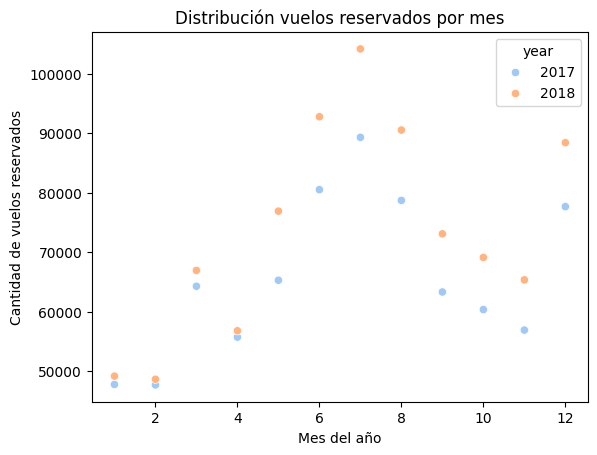

In [19]:

# Usamos scatterplot ya que esta nos permite representar una distribución de variables numéricas donde hacemos una comparativa por año de dichas distribuciones 
sns.scatterplot(x="month", 
                y="flights_booked", 
                data=vuelos_anio_mes, 
                hue="year", 
                palette="pastel")

plt.title("Distribución vuelos reservados por mes")
plt.xlabel("Mes del año")
plt.ylabel("Cantidad de vuelos reservados")



2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?


In [20]:
# Creamos un DataFrame con la suma total de puntos acumulados por distancia
df_puntos = df_merge.groupby("distance")["points_accumulated"].sum().reset_index(name= "Puntos totales")
df_puntos.head()


,distance,Puntos totales
0,0,0.00
1,90,9.00
2,91,27.72
3,92,18.00
4,94,27.00


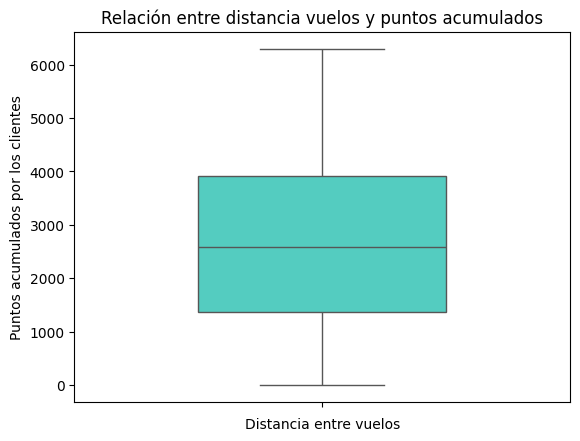

In [21]:
# Añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(y = "distance", 
            data = df_puntos, 
            width = 0.5, 
            color = "turquoise")

# Cambiamos el nombre del eje X
plt.xlabel("Distancia entre vuelos")

# Cambiamos el nombre del eje Y
plt.ylabel("Puntos acumulados por los clientes")

# Cambiamos el nombre del título de la gráfica
plt.title("Relación entre distancia vuelos y puntos acumulados");


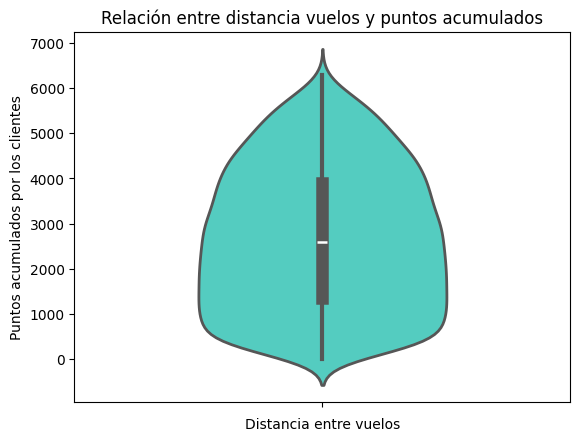

In [22]:
# Creamos un violinplot usando Seaborn
sns.violinplot(y = "distance", 
               data = df_puntos, 
               width = 0.5, 
               color = "turquoise", 
               linewidth = 2)

# Cambiamos el nombre del eje X
plt.xlabel("Distancia entre vuelos")

# Cambiamos el nombre del eje Y
plt.ylabel("Puntos acumulados por los clientes")

# Cambiamos el nombre del título de la gráfica
plt.title("Relación entre distancia vuelos y puntos acumulados");


In [23]:
# Calculamos el coeficiente de correlación de Pearson
corr = np.corrcoef(df_puntos["distance"], df_puntos["Puntos totales"])[0, 1]

print("Coeficiente de correlación de Pearson:", corr)


Coeficiente de correlación de Pearson: 0.10763495142972578


Text(0.5, 1.0, 'Relación entre distancia vuelos y puntos acumulados con regresión lineal')

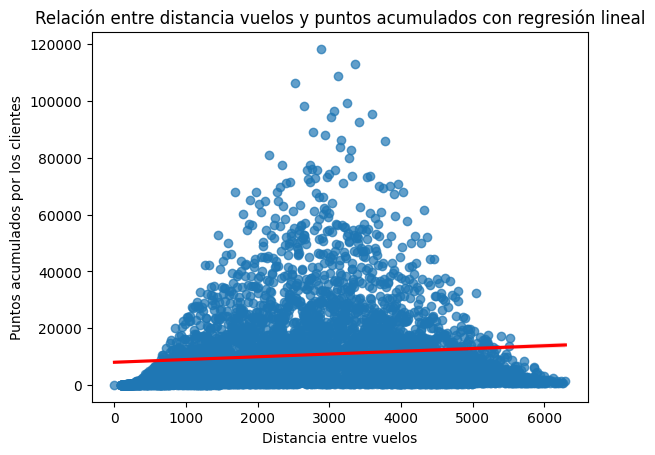

In [24]:
# Añadimos la regresión lineal al violinplot
sns.regplot(x="distance", y="Puntos totales", data=df_puntos, 
            scatter_kws={"alpha": 0.7}, line_kws={"color": "red"})

# Cambiamos el nombre del eje X
plt.xlabel("Distancia entre vuelos")

# Cambiamos el nombre del eje Y
plt.ylabel("Puntos acumulados por los clientes")

# Cambiamos el nombre del título de la gráfica
plt.title("Relación entre distancia vuelos y puntos acumulados con regresión lineal")



3. ¿Cuál es la distribución de los clientes por provincia o estado?


In [25]:
# Creamos un dataframe con la frecuencia de clientes por provincia o estado
df_clientes_provincia = df_merge.groupby("province")["province"].count().reset_index(name="num_clientes")

# Ordenamos la tabla por frecuencia
df_clientes_provincia = df_clientes_provincia.sort_values(by="num_clientes", ascending=False)
df_clientes_provincia.head()

,province,num_clientes
6,Ontario,130896
1,British Columbia,106848
8,Quebec,79968
0,Alberta,23400
2,Manitoba,15984


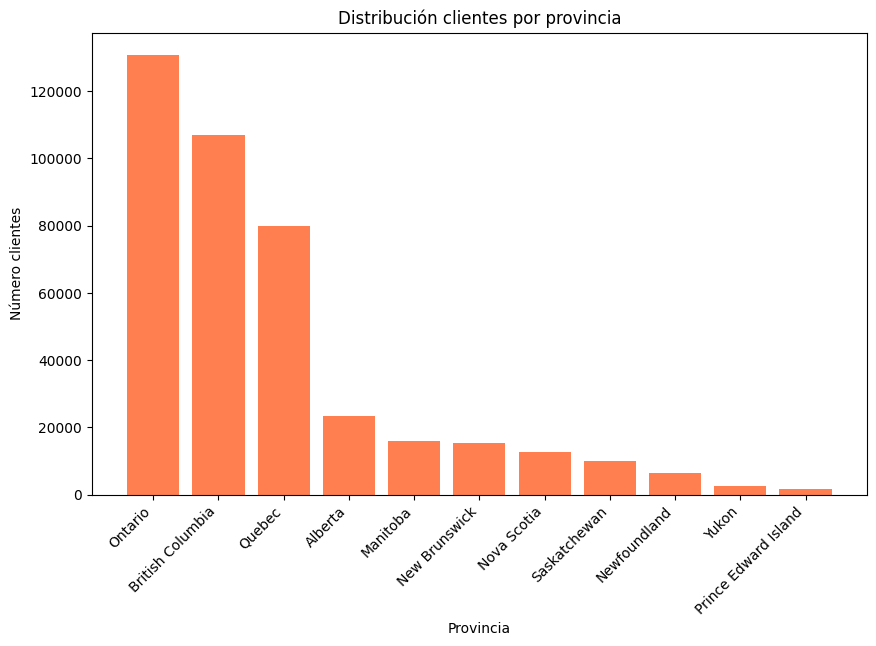

In [26]:
# Configuramos la gráfica especificando sus dimensiones de visualización 
plt.figure(figsize=(10, 6))

# Creamos un gráfico de barras para visualizar la distribución de clientes por provincia
plt.bar(df_clientes_provincia['province'],
        df_clientes_provincia['num_clientes'],
        color='coral')

# Cambiamos el nombre del eje X
plt.xlabel('Provincia')

# Cambiamos el nombre del eje Y
plt.ylabel('Número clientes')

# Cambiamos el nombre del título de la gráfica
plt.title('Distribución clientes por provincia')
plt.xticks(rotation=45, ha='right');



4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?


In [27]:
# Creamos un dataframe con el salario promedio por nivel educativo
df_educacion = df_merge.groupby("education")["salary"].mean().reset_index()
df_educacion.head()

,education,salary
0,Bachelor,72601.24
1,College,73479.00
2,Doctor,178335.44
3,High School or Below,61112.38
4,Master,103767.49


C:\Users\karin\AppData\Local\Temp\ipykernel_24088\905840929.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "education",


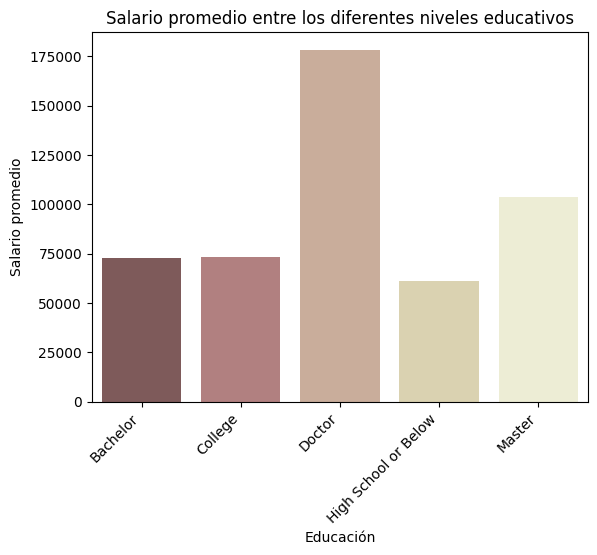

In [28]:
# Creamos un gráfico de barras usando Seaborn para mostrar el salario promedio por nivel educativo
sns.barplot(x = "education", 
            y = "salary", 
            data = df_educacion,  
            palette = "pink")

# Cambiamos el nombre del eje X
plt.xlabel("Educación")

# Cambiamos el nombre del eje Y
plt.ylabel("Salario promedio")

# Cambiamos el nombre del título de la gráfica
plt.title("Salario promedio entre los diferentes niveles educativos")
plt.xticks(rotation=45, ha='right');


5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [29]:
# Creamos un DataFrame con la frecuencia de tipos de tarjetas de fidelidad
df_fidelidad = df_merge["loyalty_card"].value_counts().to_frame().reset_index()
df_fidelidad.head()


,loyalty_card,count
0,Star,184224
1,Nova,137568
2,Aurora,83832


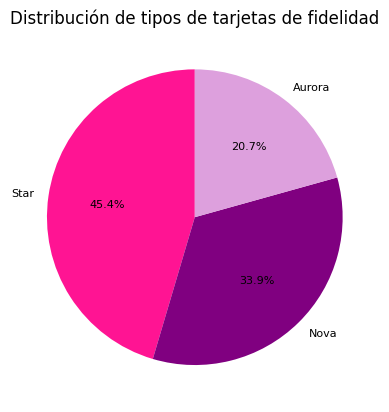

In [30]:
# Insertamos lista de colores que utilizaremos para la gráfica, para cada sector 
colores = ["deeppink", "purple", "plum"]

# Creamos un gráfico de pastel para mostrar la distribución de tipos de tarjetas de fidelidad
plt.pie("count", labels= "loyalty_card",
        data = df_fidelidad, 
        autopct=  '%1.1f%%', 
        colors = colores, 
        textprops={'fontsize': 8}, 
        startangle=90);

# Cambiamos el título de la gráfica 
plt.title("Distribución de tipos de tarjetas de fidelidad");


6. ¿Cómo se distribuyen los clientes según su estado civil y género?


In [31]:
# Creamos un DataFrame con la frecuencia de clientes por género y estado civil
df_estado = df_merge.groupby(["marital_status", "gender"]).size().reset_index(name="count")
df_estado.head()


,marital_status,gender,count
0,Divorced,Female,30888
1,Divorced,Male,30288
2,Married,Female,117816
3,Married,Male,117984
4,Single,Female,54936


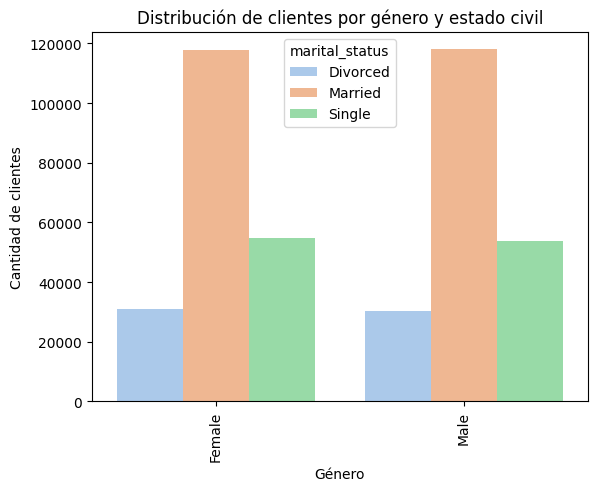

In [32]:
# Creamos un gráfico de barras apiladas para mostrar la distribución de clientes por género y estado civil
sns.barplot(x = "gender", y = "count", hue = "marital_status", data = df_estado, palette = "pastel")
# Especificamos la rotación de los valores de la variable x para una correcta visualización 
plt.xticks(rotation = 90)

# Cambiamos los nombres a variable x e y y además insertamos título a la gráfica
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.title("Distribución de clientes por género y estado civil");



## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo
Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos
reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:
1. Preparación de Datos:
Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.
2. Análisis Descriptivo:
Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del
número de vuelos reservados para cada grupo.
3. Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes
niveles educativos.

**Hipótesis Nula (H0):**

No hay diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

**Hipótesis Alternativa (H1):**

Existe al menos una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [33]:
# Abrimos el data frame clasificado solo por las columnas que nos interesan en este caso para realizar el análisis
df_education_flights = df_merge[['flights_booked', 'education']]
df_education_flights.head()


,flights_booked,education
Loyalty Number,,
100018,3,Bachelor
100102,10,College
100140,6,College
100214,0,Bachelor
100272,0,Bachelor


In [34]:
# Análisis Descriptivo
# Agrupamos por education 
grupo_educativo = df_merge.groupby('education')['flights_booked']
grupo_educativo.head()

# Sacaremos las estadísticas descriptivas del grupo educativo 
estadisticas_descriptivas = grupo_educativo.describe()
estadisticas_descriptivas

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
Bachelor,253752.00,4.09,5.22,0.00,0.00,1.00,8.00,21.00
College,102672.00,4.15,5.24,0.00,0.00,1.00,8.00,21.00
Doctor,17856.00,4.15,5.25,0.00,0.00,1.00,8.00,21.00
High School or Below,19008.00,4.16,5.23,0.00,0.00,1.00,8.00,21.00
Master,12336.00,4.18,5.21,0.00,0.00,1.00,8.00,21.00


In [35]:
def tasa_conversion(df, nivel_estudio): 
    # Filtramos el DataFrame por el grupo educativo
    grupo = df[df["education"] == nivel_estudio]

    # Calculamos la tasa de conversión
    conversion_rate = grupo["flights_booked"].sum() / grupo["flights_booked"].count()

    return conversion_rate

grupos_educativos = ["Bachelor", "College", "Doctor", "Master", "High School or Below"]

for grupo in grupos_educativos:
    conversion_rate = tasa_conversion(df_merge, grupo)
    print(f"Tasa de conversión para el grupo educativo {grupo}: {conversion_rate}")


Tasa de conversión para el grupo educativo Bachelor: 4.09109287808569
Tasa de conversión para el grupo educativo College: 4.153011531868474
Tasa de conversión para el grupo educativo Doctor: 4.146281362007168
Tasa de conversión para el grupo educativo Master: 4.184014267185473
Tasa de conversión para el grupo educativo High School or Below: 4.155776515151516


Como vemos, parece que las tasas de conversión son bastante similares entre los diferentes grupos educativos, con valores en el rango de aproximadamente 4.09% a 4.18%.

Esto podría interpretarse como que no hay una diferencia significativa en la proporción de usuarios que reservaron vuelos entre los diferentes niveles educativos. Sin embargo, para realizar una evaluación más precisa de si estas diferencias son estadísticamente significativas, es necesario realizar pruebas adicionales, como pruebas de hipótesis.

In [38]:
# Generamos el test anova con los diferentes grupos de educación: 
anova_resultado = f_oneway(df_merge[df_merge["education"] == "Bachelor"]["flights_booked"],
                            df_merge[df_merge["education"] == "College"]["flights_booked"],
                            df_merge[df_merge["education"] == "Doctor"]["flights_booked"],
                            df_merge[df_merge["education"] == "Master"]["flights_booked"],
                            df_merge[df_merge["education"] == "High School or Below"]["flights_booked"])

# Imprimimos los resultados
print("Estadístico F:", anova_resultado.statistic)
print("Valor p:", anova_resultado.pvalue)

# Interpretamos los resultados
alpha = 0.05
if anova_resultado.pvalue < alpha:
    print("Hay diferencias significativas en el número de vuelos reservados entre al menos dos grupos.")
    print("\n ---------- \n")
    print("""
          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          """)
else:
    print("No hay evidencia de diferencias significativas en el número de vuelos reservados entre los grupos.")
    print("\n ---------- \n")
    print(""" 
          Los resultados sugieren que no existe evidencia estadística para afirmar que las medias de las muestras son distintas,
          por lo que la nueva campaña no está ayudando a nuestro problema. 
          """)

Estadístico F: 3.6733946181077775
Valor p: 0.0053813763400946376
Hay diferencias significativas en el número de vuelos reservados entre al menos dos grupos.

 ---------- 


          Los resultados sugieren que existe evidencia estadística para afirmar que las medias de las muestras son distintas. 
          Por lo tanto, nuestro nuevo sistema tiene los efectos deseados y deberíamos cambiar la nueva versión de anuncios   
          


C:\Users\karin\AppData\Local\Temp\ipykernel_24088\3368022142.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="education",


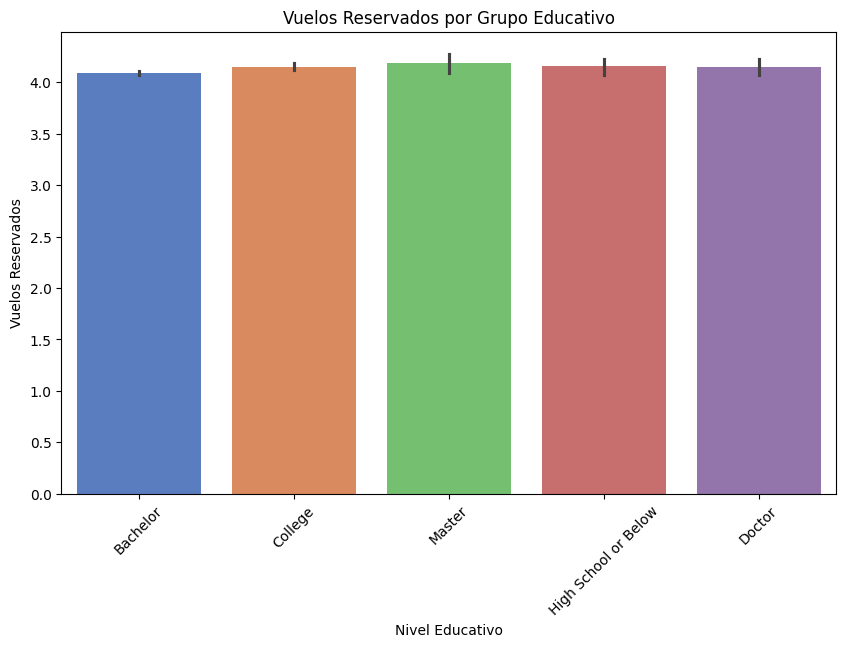

In [42]:
# Gráfico de barras para visualizar los diferentes grupos y sus vuelos reservados
plt.figure(figsize=(10, 6))

sns.barplot(x="education", 
            y="flights_booked", 
            data=df_merge, 
            palette="muted")

# Modificamos el título y el nombre de las variables x e y: 
plt.title("Vuelos Reservados por Grupo Educativo")
plt.xlabel("Nivel Educativo")
plt.ylabel("Vuelos Reservados")
plt.xticks(rotation=45);


In [49]:
# Creamos una tabla de contingencia
contingency_table = pd.crosstab(df_merge['education'], df_merge['flights_booked'])

# Realizamos la prueba de chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Imprimimos los resultados
print("Estadístico Chi-cuadrado:", chi2)
print("Valor p:", p)


Estadístico Chi-cuadrado: 114.78280380476771
Valor p: 0.01446243649827129


In [55]:
# Calculamos la correlación de rango de Kendall
kendall_corr, kendall_p = kendalltau(df_merge['flights_booked'], df_merge['education'])

# Imprimimos y analizamos los resultados
print("Correlación de rango de Kendall:", kendall_corr)
print("Valor p de Kendall:", kendall_p)


Correlación de rango de Kendall: 0.005521821904778577
Valor p de Kendall: 3.444053814318626e-05


**CONCLUSIONES:**

- Estadístico F:

    El estadístico F es 3.67 con un valor p de 0.00538.
    Este resultado sugiere que hay diferencias significativas en el número de vuelos reservados entre al menos dos grupos educativos.
    La significancia estadística implica que las medias de las muestras son distintas, lo que indica que el nivel educativo **si podría estar relacionado con el número de vuelos reservados**. Esto sugiere que el nivel educativo puede ser un factor importante a considerar al analizar el comportamiento de reserva de vuelos de los clientes.

- Estadístico Chi-cuadrado:

    El valor del estadístico Chi-cuadrado es 114.78 con un valor p de 0.0145.
    Esto sugiere que hay una asociación significativa entre las variables categóricas evaluadas en el análisis de chi-cuadrado.
    En este caso, la asociación podría ser entre las diferentes categorías de vuelos reservados y las variables educativas.

- Correlación de rango de Kendall:

    El coeficiente de correlación de rango de Kendall es 0.00552 con un valor p muy bajo (3.44e-05).
    Esto indica que hay una correlación débil pero significativa entre las variables evaluadas utilizando la correlación de rango de Kendall.
    Aunque la correlación es débil, el valor p sugiere que esta relación es **estadísticamente significativa**.
